In [1]:
%matplotlib inline
import importlib, mozpy, logging, sys
import matplotlib.pyplot as plt

In [2]:
importlib.reload(mozpy)
logging.basicConfig(stream = sys.stderr, level = logging.INFO)

In [3]:
# %cat ./springmassdamper.moz
%cat ./springmassdamper_eoo.moz

include GRAPHSIMCLI

def p1, p2: Point
def d, k, m, t: Real
def u: Force
def y: Position

def system = Spring1d(-k) || Damper1d(-d) || Mass1d(m)

def model = {
  param d 2.0;
  param k 3.0;
  param m 4.0;
  probe y;

  Clock(0., t);
  u = -m * GRAVITATIONAL_CONSTANT;
  // u = sin(t);
  p1 -- system -- p2;
  p1 -- (ForceActuator1d(u) || PositionSensor1d(-y)) -- p2
}

def main = (export2ModelicaCLI model)


In [4]:
# model = mozpy.Model("./springmassdamper.moz", "python ../../docker_moz.py")
# model = mozpy.Model("./springmassdamper.moz")
model = mozpy.Model("./springmassdamper_eoo.moz")

In [5]:
model.elaborate().set_parameters(d_1=2.5, k_1=14).simulate(start_time=0, stop_time=20, step_size=0.1)

2019-10-23 11:50:16,394 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.oerikss.port.ed84b750dc2345a2ae4f4941685cd323 pid=2179
INFO:OMPython:OMC Server is up and running at file:////tmp/openmodelica.oerikss.port.ed84b750dc2345a2ae4f4941685cd323 pid=2179


In [6]:
print(model.model)

model Model
 parameter Real m_1 = 4.;
 parameter Real k_1 = 3.;
 parameter Real d_1 = 2.;
protected
 Real F_K_1 annotation(HideResult=true);
 Real x_K_1 annotation(HideResult=true);
 Real v_D_1 annotation(HideResult=true);
 Real F_D_1 annotation(HideResult=true);
 Real x_D_1 annotation(HideResult=true);
 Real v_M_1 annotation(HideResult=true);
 Real F_M_1 annotation(HideResult=true);
 Real x_M_1 annotation(HideResult=true);
 Real x_A_1 annotation(HideResult=true);
 Real x_S_1 annotation(HideResult=true);
 Real y_1 annotation(HideResult=false);
 Real u_1 annotation(HideResult=true);
 Real t_1 (start=0., fixed=true) annotation(HideResult=true);
initial equation
equation
 der(t_1) = 1.;
 u_1 = (-m_1) * 9.81;
 F_K_1 = (-(-k_1)) * x_K_1;
 der(x_D_1) = v_D_1;
 F_D_1 = (-(-d_1)) * v_D_1;
 der(x_M_1) = v_M_1;
 F_M_1 = m_1 * der(v_M_1);
 x_S_1 = (-y_1);
 x_A_1 = 1. * x_S_1;
 x_M_1 = 1. * x_S_1;
 x_D_1 = 1. * x_S_1;
 x_K_1 = 1. * x_S_1;
 0. = ((((-1.) * F_K_1 - 1. * F_D_1) - 1. * F_M_1) - 1. * u

In [7]:
model.get_parameters()

{'d_1': 2.5, 'k_1': 14.0, 'm_1': 4.0}

In [8]:
model.get_solved_variables()

('d_1', 'k_1', 'm_1', 'time', 'x_D_1', 'y_1')

In [9]:
tt = model.get_solutions("time")

In [10]:
yy = model.get_solutions("y_1")

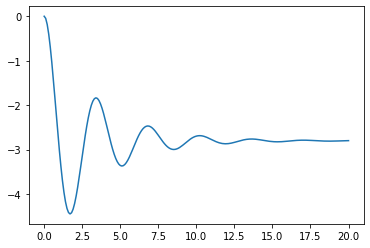

In [11]:
plt.plot(tt, yy)

In [12]:
# model.get_solutions(["t_1", "y_1"])

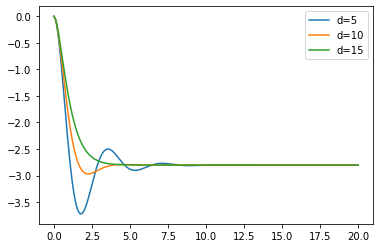

In [13]:
for d in [5, 10, 15]:
    model.set_parameters(d_1=d)
    model.simulate(step_size=0.1)
    tt = model.get_solutions("time")
    yy = model.get_solutions("y_1")
    plt.plot(tt, yy, label=f"d={d}")
plt.legend()
plt.show()